<a href="https://colab.research.google.com/github/marth418/unsupervised-predict-streamlit-template/blob/master/Team_6_Recommenderf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Movies Recommender system

### Team members

1. Christinah Chokwe
2. Floyd Skakane
3. Kwenadi Letsoalo
4. Gudani Mbedzi
5. Patrick 

## Table of contents

## 1. Introduction

Recommender systems are systems that are designed to recommend items to users based on different factors. Items can be movies, books, songs etc. The factors are similarities between items and similarities between users. In current times recommender systems have become not only popular but also vital, because the help a company stand out from the competitors leading to customer satisfaction and therefore increased revenue.Webservices that use recommender system such as Facebook, Netflix and YouTube among others have become a part of our daily lives. Algorithms behind these systems make it possible for relevant items to be suggested to users.

There are two types of recommender system methods namely; Collaborative-based filtering and Content-based filtering. In **collaborative based filtering** recommendations are made based on similarities between users or between items. The method is based on the idea that people who agree in the evaluation of certain items are more likely to agree again in the future (e.g Friends who like similar movies. If users 1 and 2 like movie A and user 1 has watched has liked movie B, the chances are very high that user 2 will also like movie B). **Content-based filtering** is based on the similarities between the features of items. Users are recommended items that are similar to items that they like (e.g If a user like item A which is similar to item B, the user will be recommended item B based on its similarity to item A).

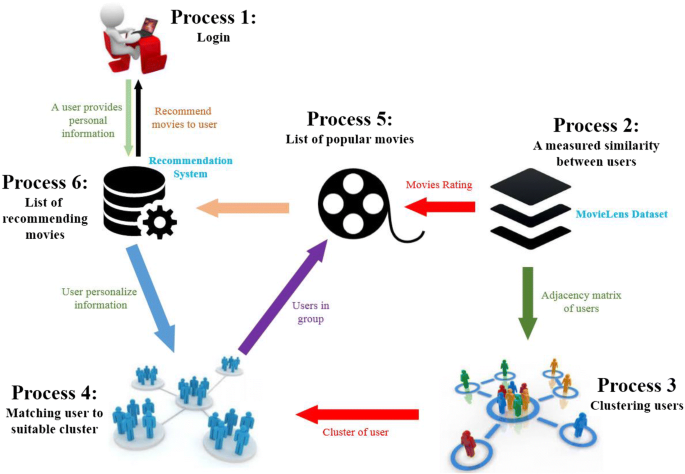

In [5]:
from PIL import Image
img = Image.open('recommender system flow.png')
img

## 2. Problem Statement

To build a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

This model will enable our comapny to give users personalized recommendations leading to customer satisfaction.

## 3. Connecting to Comet

In [1]:
# Prject workspace linked to Comet experiment for version control
from comet_ml import Experiment

experiment = Experiment(
    api_key="F3rSD8MTRVMEXv1vtpSFsaw9j",
    project_name="team-6-unsupervised-learning",
    workspace="gudani",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/gudani/team-6-unsupervised-learning/9241e7f865674184b9ee90e6fd6594ef



## 4. Import Libraries

In [2]:
# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

# Exploratory Data Analysis
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Data Preprocessing
import random
from time import time
import cufflinks as cf
import comet_ml
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.preprocessing import StandardScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from datetime import datetime
from math import sqrt

# Models
from surprise import Reader, Dataset
from surprise import SVD, SVDpp, NormalPredictor, BaselineOnly, NMF, SlopeOne, CoClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Performance Evaluation
from surprise import accuracy
from sklearn.metrics import mean_squared_error
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split

# Display
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")
pd.set_option('display.max_columns', 37)

## 5. Load Dataset

In [3]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
movies_df=pd.read_csv('movies.csv')
imdb_df=pd.read_csv('imdb_data.csv')
g_scores_df=pd.read_csv('genome_scores.csv')
g_tags_df=pd.read_csv('genome_tags.csv')
links_df=pd.read_csv('links.csv')
tags_df=pd.read_csv('tags.csv')

### Feature Description

**Numeric**
* **budget:** - (continuous) dollar cost of production of the movie.
* **rating:** - (discrete) users rating of a movie from. **TARGET**
* **relevance:** - (continuous) measure (0-1) of the relevance of a genome tag to the movie, where 1 impies 100% relevance.
* **runtime:** - (continuos) movie duration in minutes.
* **timestamp:** - (continuous) the time at which a user rated the movie.


**Categorical**
* **director:** - (nominal) the person who controls the making of a film and supervises the actors and technical crew.
* **genres:** - (nominal) the style or category of the movie. A movie may belong to multiple (up to nineteen) genres, or may be absent a genre listing.
* **imdbId:** - (nominal) unique indentifying key for each IMBD entry. Can also be used in conjunction with the TMDB API.
* **movieId:** - (nominal) a unique identifier for each movie. There are 48,213 unique movies.
* **plot_keywords:** - (nominal) key words used to identify characteristics of a movie's storyline.
* **tag:** - (nominal) genome label
* **tagId:** - (nominal) unique genome identifier.
* **tmdbId:** - (nominal) unique identifier that works in conjunction with the TMDB API.
* **title:** - (nominal) the unique title identifying the movie. Included is a year of release enclosed in parenthesis at the end of the title.
* **title_cast:** - (nominal) the actors of the main characters in the movie. This does not include extras.
* **userId:** - (nominal) a unique identifier for each user. There are 162,541 unique users.


## 6. Exploratory Data Analysis

### 6.1 Data analysis

* Here we will look at the feature of the different datasets and their datatypes
* Explore the datasets shapes
* We will check for missing values
* Look at the data summary for the movies ratings

#### i) Train Dataframe

In [116]:
#The length of the dataset and the preview of the top 5 records
print('There are',len(train_df.columns), 'columns in the dataset')
print('There are', len(train_df), 'rows in the dataset')
train_df.head(5)

There are 4 columns in the dataset
There are 10000038 rows in the dataset


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [5]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


None

In [6]:
#Check for missing values
print(str(train_df.isnull().sum()))

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


We can observe that this dataset consists of only numerical data and the are no missing values

In [7]:
train_df['rating'].describe()

count    1.000004e+07
mean     3.533395e+00
std      1.061124e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

The mean rating is 3.5 while the minimum is 0.5.And approximately 10000040 ratings.

#### ii) Test Dataframe

In [8]:
#The length of the dataset and the preview of the top 5 records
print('There are',len(test_df.columns), 'columns in the dataset')
print('There are', len(test_df), 'rows in the dataset')
test_df.head(5)

There are 2 columns in the dataset
There are 5000019 rows in the dataset


,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [9]:
display(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


None

In [10]:
#Check for missing values
print(str(test_df.isnull().sum()))

userId     0
movieId    0
dtype: int64


The dataset also contains only numeric data and no missing were are detected.

#### iii) Movies Dataframe

In [11]:
#The length of the dataset and the preview of the top 5 records
print('There are',len(movies_df.columns), 'columns in the dataset')
print('There are', len(movies_df), 'rows in the dataset')
movies_df.head(5)

There are 3 columns in the dataset
There are 62423 rows in the dataset


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
display(movies_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


None

In [13]:
#Check for missing values
print(str(movies_df.isnull().sum()))

movieId    0
title      0
genres     0
dtype: int64


This dataset consists of two columns with non-numeric data and one column with numeric data. There are no missing values in the dataset.

#### iv) IMDB Dataframe

In [14]:
#The length of the dataset and the preview of the top 5 records
print('There are',len(imdb_df.columns), 'columns in the dataset')
print('There are', len(imdb_df), 'rows in the dataset')
imdb_df.head(5)

There are 6 columns in the dataset
There are 27278 rows in the dataset


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [15]:
display(imdb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


None

In [16]:
#Check for missing values
print(str(imdb_df.isnull().sum()))

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64


The dataset consists of the mixture of non-numeric and numerical data. There are missing values in the columns for 'director', 'title_cast', 'runtime', 'budget' and 'plot_keywords'.

#### v) Genome Scores Dataframe

In [17]:
#The length of the dataset and the preview of the top 5 records
print('There are',len(g_scores_df.columns), 'columns in the dataset')
print('There are', len(g_scores_df), 'rows in the dataset')
g_scores_df.head(5)

There are 3 columns in the dataset
There are 15584448 rows in the dataset


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [18]:
display(g_scores_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


None

In [19]:
#Check for missing values
print(str(g_scores_df.isnull().sum()))

movieId      0
tagId        0
relevance    0
dtype: int64


#### vi) Genome Tags Dataframe

In [20]:
#The length of the dataset and the preview of the top 5 records
print('There are',len(g_tags_df.columns), 'columns in the dataset')
print('There are', len(g_tags_df), 'rows in the dataset')
g_tags_df.head(5)

There are 2 columns in the dataset
There are 1128 rows in the dataset


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [21]:
display(g_tags_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


None

In [22]:
#Check for missing values
print(str(g_tags_df.isnull().sum()))

tagId    0
tag      0
dtype: int64


#### vii) Links Dataframe

In [23]:
#The length of the dataset and the preview of the top 5 records
print('There are',len(links_df.columns), 'columns in the dataset')
print('There are', len(links_df), 'rows in the dataset')
links_df.head(5)

There are 3 columns in the dataset
There are 62423 rows in the dataset


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [24]:
display(links_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


None

In [25]:
#Check for missing values
print(str(links_df.isnull().sum()))

movieId      0
imdbId       0
tmdbId     107
dtype: int64


#### viii) Tags Dataframe

In [27]:
#The length of the dataset and the preview of the top 5 records
print('There are',len(tags_df.columns), 'columns in the dataset')
print('There are', len(tags_df), 'rows in the dataset')
tags_df.head(5)

There are 4 columns in the dataset
There are 1093360 rows in the dataset


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [28]:
display(tags_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


None

In [29]:
#Check for missing values
print(str(tags_df.isnull().sum()))

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64


### 6.2 Data Visualiation

Here we will explore the data further using visuals.

#### i) Merge Datasets

We merge the imdb and the movies dataframes to put all the details about the movies into one dataframe for easy access.

In [31]:
#Merge movies and imdb dataframe
movies_imdb_df = pd.merge(imdb_df, movies_df, left_on='movieId', right_on='movieId', how='left').drop('movieId', axis=1)
print('Shape:' ,movies_imdb_df.shape)

Shape: (27278, 7)


In [90]:
df = movies_imdb_df.copy()
df.head()

,title_cast,director,runtime,budget,plot_keywords,title,genres
0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game,Jumanji (1995),Adventure|Children|Fantasy
2,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry,Grumpier Old Men (1995),Comedy|Romance
3,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion,Father of the Bride Part II (1995),Comedy


In [33]:
#Check for missing values
print(str(movies_imdb_df.isnull().sum()))

title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
title             2412
genres            2412
dtype: int64


In [34]:
movies_imdb_df.head()

,title_cast,director,runtime,budget,plot_keywords,title,genres
0,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game,Jumanji (1995),Adventure|Children|Fantasy
2,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry,Grumpier Old Men (1995),Comedy|Romance
3,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion,Father of the Bride Part II (1995),Comedy


There are a total of ***24,866*** movies with ***6+ features***. All the columns have missing values. We will attempt to clean this dataset to a form suitable one for analysis in the next section.

We link the user and their ratings to movie titles by merging the train and movies datasets. 

In [4]:
# Merge movies and train dataframes
movie_rating_df = pd.merge(movies_df, train_df, left_on='movieId', right_on='movieId', how='left').drop('movieId', axis=1)
print('Shape:' ,movie_rating_df.shape)

Shape: (10014248, 5)


In [36]:
movie_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10014248 entries, 0 to 10014247
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   genres     object 
 2   userId     float64
 3   rating     float64
 4   timestamp  float64
dtypes: float64(3), object(2)
memory usage: 458.4+ MB


In [37]:
#Check for missing values
print(str(movie_rating_df.isnull().sum()))

title            0
genres           0
userId       14210
rating       14210
timestamp    14210
dtype: int64


In [91]:
#Making a copy of movie_rating_df
df_two = movie_rating_df.copy()
df_two.head()

,title,genres,userId,rating,timestamp
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,158849.0,5.0,9.947168e+08
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,97203.0,5.0,9.426832e+08
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,161871.0,3.0,8.331046e+08
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,45117.0,4.0,1.442257e+09
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27431.0,5.0,8.496678e+08


After merging the train and movies datasets, our new dataframe has missing values in the columns for 'userId', 'rating' and 'timestamp'.

#### ii) Visualization

##### We will use wordclouds to look for genres, directors, and title casts that feature the most in our dataset. 

In [40]:
#Converting the columns to strings
movies_df['genres'] = movies_df['genres'].astype('str')
imdb_df['director'] = imdb_df['director'].astype('str')
imdb_df['title_cast'] = imdb_df['title_cast'].astype('str')


In [41]:
genres_corpus = ' '.join(movies_df['genres'])
director_corpus = ' '.join(imdb_df['director'])
title_cast_corpus = ' '.join(imdb_df['title_cast'])

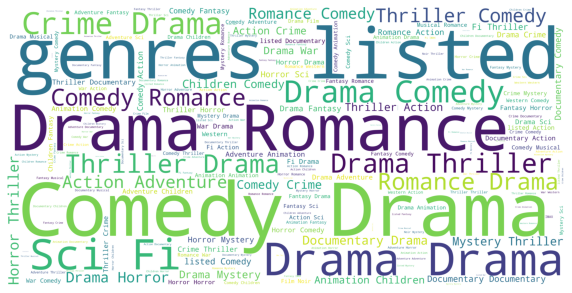

In [43]:
#Generating the wordcloud
genres_wordcloud = WordCloud(stopwords=STOPWORDS,
                             background_color='white', 
                             height=2000, width=4000).generate(genres_corpus)
plt.figure(figsize=(10,8))
plt.imshow(genres_wordcloud)
plt.axis('off')
plt.show()

We can observe that most of the movies in our dataset fall under the genres; drama, comedy and romance.

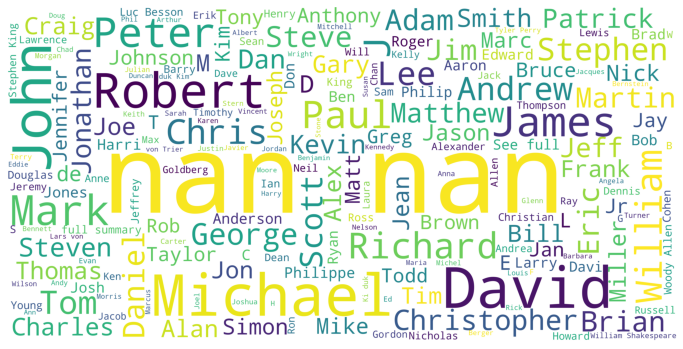

In [45]:
director_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',
                               height=2000, width=4000).generate(director_corpus)
plt.figure(figsize=(12,8))
plt.imshow(director_wordcloud)
plt.axis('off')
plt.show()

Robert, Michael, John, David and Peter directed most of the movies in our dataset.

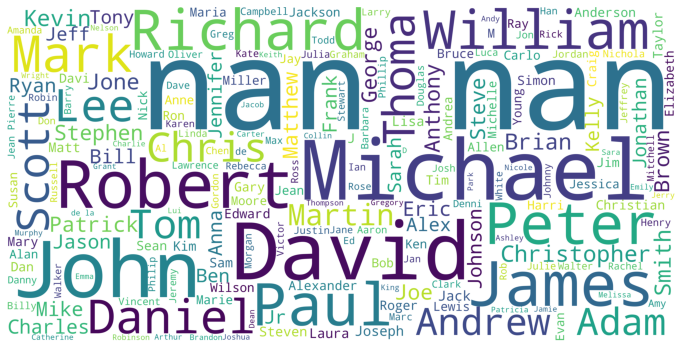

In [46]:
title_cast_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',
                                 height=2000, width=4000).generate(title_cast_corpus)
plt.figure(figsize=(12,8))
plt.imshow(title_cast_wordcloud)
plt.axis('off')
plt.show()

Michael, Robert, Richard, David, John and William were involved in most movies in our dataset.

####  Let's visualize the ratings

In [47]:
def changingLabels(number):
    '''' Helper function to Change the
numeric label in terms of Millions'''
    
    return str(number/10**6) + "M"

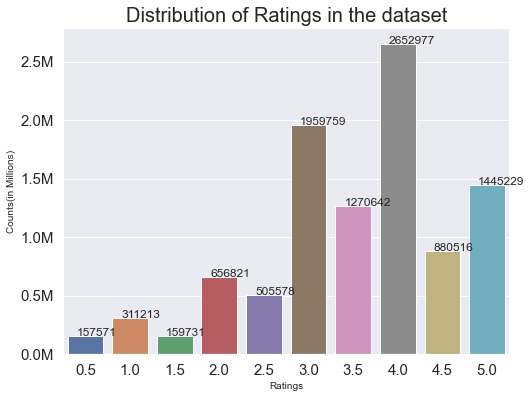

In [92]:
# Visualising the distribution of the feature "rating"

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(8, 6), sharey=True)

sns.countplot("rating", data=df_two, ax=axes)
axes.set_yticklabels([changingLabels(num) for num in axes.get_yticks()])
for p in axes.patches:
    axes.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+100))

plt.tick_params(labelsize = 15)
plt.title("Distribution of Ratings in the dataset", fontsize = 20)
plt.xlabel("Ratings", fontsize = 10)
plt.ylabel("Counts(in Millions)", fontsize = 10)
plt.show()

It is interesting that the ratings are left-skewed. It was expected that there would be a normal distrubtion with a mean rating of 3. Instead, we observe that users tend to rate movies quite favourably and tend to avoid negative ratings. This skew might be explained by the tendency of users to rate movies they liked. In other words, if a user doesn't like a movie, it is unlikely that they will watch it through to the end, let alone rate it.

#### Observations:

* The ratings given by users to movies lies in between 0.5 to 5.
* A high proportion of the movies have been rated 3, 3.5 or 4 by the users.
* The distribution of ratings look a bit left skewed as large proportion of ratings is in between 3 to 5.

##### Now we have a look at users who have rated the most movies:

In [93]:
def user_ratings_count(df_two, n):
    
    '''''Function that takes in a dataframe and a number (n),
its plots the n rated movies''''

    plt.figure(figsize=(8,6))
    data = df_two['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index)
    for p in ax.patches:
        axes.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+100))
    plt.title(f'Top {n} Users by Number of Ratings', fontsize=14)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    print("Combined number of ratings:\t",df_two['userId'].value_counts().head(n).sum(),
         "\nTotal number of movies:\t\t", df_two['movieId'].nunique())
    plt.show()

Combined number of ratings:	 38970 
Total number of movies:		 48213


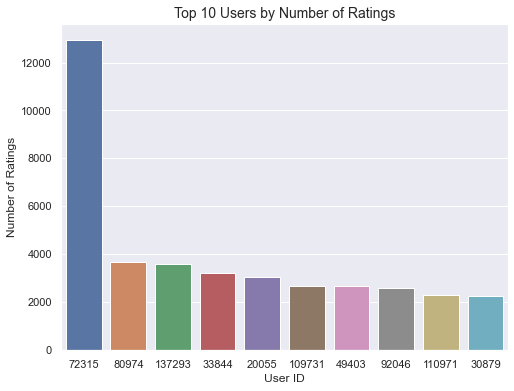

In [94]:
user_ratings_count(train_df,10)

In the figure above user 72315 has rated an extreme number of movies relative to other users.

##### We have a look at the mean and median for  ratings in our dataset

In [95]:
def ratings_distplot(df_two, column='rating'):
    
    '''''Function that takes a dataframe,
from the dataframe it calculate the mean and median of the ratings column
and plots the rating distribution and marks the mean and median''''
    
    plt.figure(figsize=(8,6))
    ax = sns.distplot(df_two[f'{column}'],bins=10, kde=False, hist_kws=dict(alpha=0.6),color="#4D17A0")
    mean = df_two[f'{column}'].mean()
    median = df_two[f'{column}'].median()
    plt.axvline(x=mean, label = f'mean {round(mean,2)}' , color='#4D17A0', lw=3, ls = '--')
    plt.axvline(x=median, label = f'median {median}' , color='#4DA017', lw=3, ls = '--')
    plt.xlim((0.5,5))
    plt.ylim((0,2500000))
    plt.title(f'Distribution of Ratings', fontsize=14)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

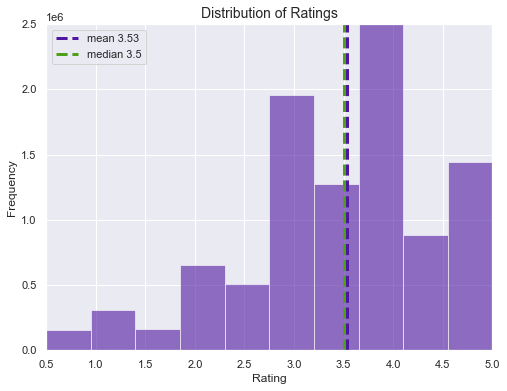

In [96]:
#Applying the ratings_displot function to the movie_rating dataframe
ratings_distplot(movie_rating_df)

The mean rating is 3.53 with the the median of 3.5, this indicates that the ratings are almost normally distributed.

##### Now we will investigate the relationship between the number of movies a user has rated and the mean rating that they have given

In [109]:
def mean_ratings_scatter(df_two, color='#4DA017', column='userId'):
    
    '''''Function that calculates the number of ratings per user
and plots that against the mean rating of each user''''
    
    plt.figure(figsize=(6,4))
    mean_ratings = df_two.groupby(f'{column}')['rating'].mean()
    user_counts = df_two.groupby(f'{column}')['movieId'].count().values
    sns.scatterplot(x=mean_ratings, y = user_counts, color=color)
    plt.title(f'Mean Ratings by Number of Ratings', fontsize=14)
    plt.xlabel('Rating')
    plt.ylabel('Number of Ratings/user')
    plt.show()

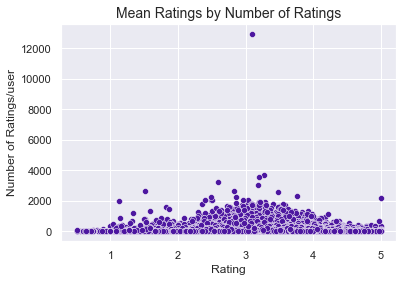

In [110]:
# Mean user ratings by number of ratings
mean_ratings_scatter(train_df,'#4D17A0')

There doesn't seem to be a relationship, as the number of ratings and how a user rates a movie do not show any correlation. However, we can see that our user that gave the most ratings (over 12000) mostly gave rating of above 3.

##### Is there a relationship between the number of ratings a movie has and how highly it is rated?

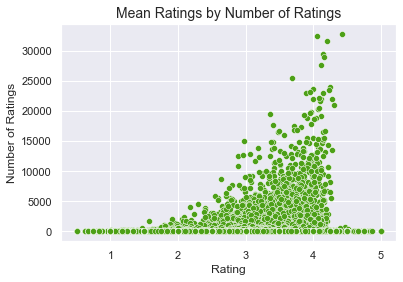

In [99]:
# Mean movie ratings by number of ratings
mean_ratings_scatter(train_df, column='movieId')

This time we do see a relationship, the more ratings a movie has, the more likely that it will be given high rating. This confirms our intuitive understanding users rate movies that they tend to watch until the end, which are movies that they enjoy. And those movies that users do not watch until the end because they do not enjoy them, are not rated.

####  Genres

In the figure above user 72315 has rated an extreme number of movies relative to other users. For EDA purposes, this user is removed to make interpretation easier.

In [100]:
#docstring
def feature_frequency(df_two, column):
    
    '''''Function to retrieve and count the number of entries in the column
    and put the data in a dictionary then convert the dictionary to a dataframe''''
    
    # Creat a dict to store values
    df_two = df_two.dropna(axis=0)
    genre_dict = {f'{column}': list(),
                 'count': list(),}
    # Retrieve a list of all possible genres
    print('retrieving features...')
    for movie in range(len(df_two)):
        gens = df_two[f'{column}'].iloc[movie].split('|')
        for gen in gens:
            if gen not in genre_dict[f'{column}']:
                genre_dict[f'{column}'].append(gen)
    # count the number of occurences of each genre
    print('counting...')
    for genre in genre_dict[f'{column}']:
        count = 0
        for movie in range(len(df)):
            gens = df_two[f'{column}'].iloc[movie].split('|')
            if genre in gens:
                count += 1
        genre_dict['count'].append(count)
        
        # Calculate metrics
    data = pd.DataFrame(genre_dict)
    print('done!')
    return data
genres = feature_frequency(movies_df, 'genres')

retrieving features...
counting...
done!


In [102]:
#docstring
def feature_count(df_two, column):
    
    ''''' Function that takes a dataframe and a column
    and plots a barplot of the column names and the count for each column name''''
    
    plt.figure(figsize=(8,6))
    ax = sns.barplot(y = df_two[f'{column}'], x = df_two['count'])
    plt.title(f'Number of Movies Per {column}', fontsize=14)
    plt.ylabel(f'{column}')
    plt.xlabel('Count')
    plt.show()

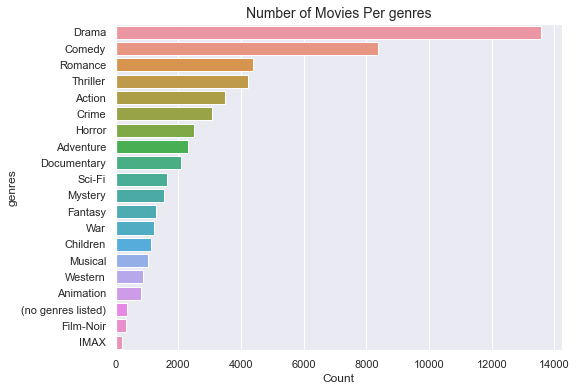

In [103]:
feature_count(genres.sort_values(by = 'count', ascending=False), 'genres')

Drama is the most frequently occuring genre in the database. Less than movies have missing genres. We can use the IMDB and TMDB ID's together with the APIs to fill missing data. Further, IMAX is not a genre but rather a proprietary system for mass-viewings.

##### Lets calculate a mean rating and append it to the data

In [104]:
#docstring
def mean_calc(feat_df, ratings = train_df, movies = movies_df, metadata = imdb_df, column = 'genres'):
    mean_ratings = pd.DataFrame(ratings.merge(movies, on='movieId', how='left').groupby(['movieId'])['rating'].mean())
    movie_eda = movies.copy()
    movie_eda = movie_eda.merge(mean_ratings, on = 'movieId', how = 'left')

    # Exclude missing values
    movie_eda = movie_eda
    movie_eda2 = movie_eda[movie_eda['rating'].notnull()]

    means = []
    for feat in feat_df[f'{column}']:
        mean = round(movie_eda2[movie_eda2[f'{column}'].str.contains(feat)]['rating'].mean(),2)
        means.append(mean)
    return means

In [105]:
genres['mean_rating'] = mean_calc(genres)

In [106]:
#Sorting the genres according to mean rating in descending order
genres.sort_values('mean_rating', ascending=False).head(5)

,genres,count,mean_rating
14,Documentary,2091,3.40
18,Film-Noir,345,3.33
15,War,1218,3.29
13,IMAX,194,3.25
6,Drama,13561,3.21


Film-Noir describes Hollywood crime dramas, particularly those that emphasize cynical attitudes and sexual motivations. The 1940s and 1950s are generally regarded as the "classic period" of American film-noir. These movies have the highest ratings but this may be as a result of it's niche audiance. The same logic can be applied to IMAX movies, as such, we will only include genres with a count of 500 or more.

In [107]:
#docstring
def genre_popularity(df_two):
    
    '''''Function to plot the mean rating per genre''''
    
    count_filt = 500
    plt.figure(figsize=(8,6))
    plot_data = df_two[df_two['count']>count_filt]
    mean = plot_data['mean_rating'].mean()
    min_ = plot_data['mean_rating'].min()
    max_ = plot_data['mean_rating'].max()
    sns.barplot(y = plot_data['genres'], x = plot_data['mean_rating'], order = plot_data['genres'])
    plt.axvline(x=mean, label = f'mean {round(mean,1)}' , color='black', lw=1, ls ='--')
    plt.axvline(x=min_, label = f'min {round(min_,1)}' , color='#4D17A0', lw=1, ls = '--')
    plt.axvline(x=max_, label = f'max {max_}' , color='#4DA017', lw=1,ls = '--')
    plt.title(f'Mean Rating Per Genre', fontsize=14)
    plt.ylabel('Genre')
    plt.xlabel('Mean Rating')
    plt.legend(loc='lower center')
    plt.show()

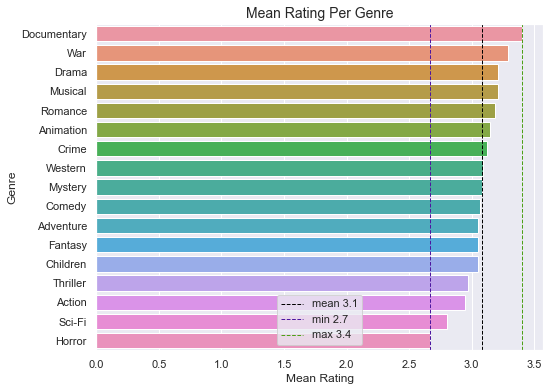

In [108]:
genre_popularity(genres.sort_values('mean_rating', ascending=False))

Documentary have the highest mean rating of 3.5 while Horror movies have a mean rating of 2.5. This indicates that our users love documentaries while horror is the least liked genre among our users.

## 7. Feature Engineering

Feature engineering refers to a process of selecting and transforming variables/features in the dataset when creating a predictive model using machine learning. Therefore we have to extract the features from the raw dataset before training the model data in machine learning algorithms. 
Feature engineering has two goals: 

a) Preparing the proper input dataset, compatible with the machine learning algorithm            requirements 
         
b) Improving the performance of machine learning models.

#### Extracting year and genre

If we look at our movie dataset, we can see that every title contains the release year of the movie. In this section we extract the year from the title column

In [ ]:
movies_df.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


We firstly use regular expressions to find a year stored between parentheses so that we don't select movies that have years in their titles. we extract the year with the parentheses from the title to the new column 'year' as shown below.

In [ ]:
#Making a copy of movies_df to work with
df_movies = movies_df.copy(deep = True)
#Using regular expressions to find a year stored between parentheses
df_movies['year'] = df_movies.title.str.extract('(\(\d\d\d\d\))',expand=False)
#so that we don't select movies that have years in their titles
df_movies.head(3)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,(1995)
1,2,Jumanji (1995),Adventure|Children|Fantasy,(1995)
2,3,Grumpier Old Men (1995),Comedy|Romance,(1995)


Unfortunately, every entry in the year column has paratheses, so we are now removing them so that the year column can be numeric.

In [ ]:
#Removing the parentheses
df_movies['year'] = df_movies.year.str.extract('(\d\d\d\d)',expand=False)
df_movies.head(3)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995


In [ ]:
#Deleting the years from the 'title' column
df_movies['title'] = df_movies.title.str.replace('(\(\d\d\d\d\))', '')
df_movies.head(3)

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995


In [ ]:
#Applying the strip function to get rid of any whitespace characters which might be at the end of a title
df_movies['title'] = df_movies['title'].apply(lambda x: x.strip())
df_movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


From the table above, the genre column has a veritcal bar |, so we remove it and create the list of the genre, as shown below

In [ ]:
#Every genre is separated by a | so we call the split function on |
df_movies['genres'] = df_movies.genres.str.split('|')
df_movies.head(3)

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995


#### Removing missing values

We now check the missing values in our data, from the output of the code below, it is clear that only the year column have null or missing values

In [ ]:
#Checking for missing values
df_movies.isna().sum()

movieId      0
title        0
genres       0
year       410
dtype: int64

Now we fill all the missing values in the year column by 0 due to the fact that null values affects the performance of the model

In [ ]:
# Filling in the missing values
df_movies.year.fillna(0, inplace=True)

#### Reducing memory size

We check the computer memory occupied by the dataset, and the year is stored as an int64 but it has only four digit, so we convert it to int16 because the four digits can fit without any data loss.

In [ ]:
#Checking for memory usage in the original movies dataframe
df_movies_original_mem = df_movies.memory_usage()
df_movies_original_mem

Index         128
movieId    499384
title      499384
genres     499384
year       499384
dtype: int64

In [ ]:
# Let's save space by converting the year column from int64 to int16, since it holds a max of just 4 digits of numbers.
df_movies.year = df_movies.year.astype('int16')

## 8. Building the recommender system

### 8.1 Content based filtering recommender system

In section 5, we performed some feature engineering on the movies dataset to get it ready to be used to build a recommender system and the recommendation algorithm. We start first by building memory-based recommender system.

Since we are building the content based and the collaborative based filtering system. These systems are built using different features, so in this section we focus on  preparing features required for building the content based filtering system.

##### Encoding genre

Unlike the collaborative filtering algorithm, the content based requires the genre column  to be used. Since the genre column is categorical, we firstly  use one-hot-encoding to generate numeric data for it and them into columns. If the movie is of a particular genre, the intersection of that movie and genre will have 1 or else the intersection will have 0.

In [ ]:
# First let's make a copy of df_movies
movies_genres = df_movies.copy(deep=True)

# Let's iterate through df_movies, then append the movie genres as columns of 1s or 0s.
# 1 if that column contains movies in the genre at the present index and 0 if not.

x = []
for index, row in df_movies.iterrows():
    x.append(index)
    for genre in row['genres']:
        movies_genres.at[index, genre] = 1

# Confirm that every row has been iterated and acted upon
print(len(x) == len(df_movies))

#Let's inspect the dataframe
movies_genres.head(20)

True


,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Father of the Bride Part II,[Comedy],1995,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Heat,"[Action, Crime, Thriller]",1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Sabrina,"[Comedy, Romance]",1995,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Tom and Huck,"[Adventure, Children]",1995,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Sudden Death,[Action],1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,GoldenEye,"[Action, Adventure, Thriller]",1995,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We now have null values in our dataset where genres are not applicable to a certain movie.Therefore we will fill these null values with zeros.

In [ ]:
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
movies_genres = movies_genres.fillna(0)
movies_genres.head(3)

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


####  Inspecting the training dataset 

The training dataset is will also be required for building our recommender system. Looking at the training dataset in the output of the code below, we can see that we have the timestamp feature, which is not required when building the content based system, so we are dropping the timestamp column.

In [ ]:
# Renaming the training dataset to ratings
ratings_df = train_df.copy(deep=True)

#Checking the shape of the dataset
print('Ratings_df shape:',ratings_df.shape) 

#Inspecting the dataset
ratings_df.head()

Ratings_df shape: (10000038, 4)


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [ ]:
# Dropping the timestamp column
ratings_df.drop('timestamp', axis=1, inplace=True)

# Confirming the drop
ratings_df.head(3)

,userId,movieId,rating
0,5163,57669,4.0
1,106343,5,4.5
2,146790,5459,5.0


From the output of the code below, it is clear that the train dataset is of the correct data type, and it does not have nulls meaning it is now ready for modelling.

In [ ]:
# Let's confirm the right data types exist per column in ratings data_set
ratings_df.dtypes

userId       int64
movieId      int64
rating     float64
dtype: object

In [ ]:
# Let's check for missing values
ratings_df.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

Now we can start with the Content-Based or Item-Item recommendation systems. This method looks at similarities between features of items and recommends items to a user based on their similarities with the user's favourite item/s. 

We start by creating a profile for our dummy user who has rated the following movies as shown below: 



* Step 1: Creating the user's Profile 

In [ ]:
# so on a scale of 0 to 5, with 0 min and 5 max, see the user's movie ratings below
user_movie_ratings = [
            {'title':'Predator', 'rating':4.9},
            {'title':'Final Destination', 'rating':4.9},
            {'title':'Toy Story', 'rating':4},
            {'title':"Casino", 'rating':3},
            {'title':'Jumanji', 'rating':4.1},
            {'title':'Waiting to Exhale', 'rating':3.9},
            {'title':'Tom and Huck', 'rating':4.1},
            {'title':'Omen, The', 'rating':5.0}
         ] 
user_movie_ratings = pd.DataFrame(user_movie_ratings)
user_movie_ratings

,title,rating
0,Predator,4.9
1,Final Destination,4.9
2,Toy Story,4.0
3,Casino,3.0
4,Jumanji,4.1
5,Waiting to Exhale,3.9
6,Tom and Huck,4.1
7,"Omen, The",5.0


With the user's input complete, let's extract the input movie's ID's from the movies dataframe and add them to our user input.

We can achieve this by first filtering out the rows that contain the input movie's title and then merging this subset with the input dataframe. We also drop unnecessary columns for the input to save memory space.

In [ ]:
# Extracting movie Ids from movies_df and updating user_movie_ratings with movie Ids.
user_movie_Id = df_movies[df_movies['title'].isin(user_movie_ratings['title'])]

# Merging user movie Id and ratings into the user_movie_ratings data frame. 
user_movie_ratings = pd.merge(user_movie_Id, user_movie_ratings)

# Display the merged and updated data frame.
user_movie_ratings

,movieId,title,genres,year,rating
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,4.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,4.1
2,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,3.9
3,8,Tom and Huck,"[Adventure, Children]",1995,4.1
4,16,Casino,"[Crime, Drama]",1995,3.0
5,1350,"Omen, The","[Horror, Mystery, Thriller]",1976,5.0
6,45662,"Omen, The","[Horror, Thriller]",2006,5.0
7,3409,Final Destination,"[Drama, Thriller]",2000,4.9
8,3527,Predator,"[Action, Sci-Fi, Thriller]",1987,4.9


In [ ]:
#Dropping the year and genres columns as we do not need them
user_movie_ratings = user_movie_ratings.drop(['genres','year'], 1)


#Final input dataframe
user_movie_ratings

,movieId,title,rating
0,1,Toy Story,4.0
1,2,Jumanji,4.1
2,4,Waiting to Exhale,3.9
3,8,Tom and Huck,4.1
4,16,Casino,3.0
5,1350,"Omen, The",5.0
6,45662,"Omen, The",5.0
7,3409,Final Destination,4.9
8,3527,Predator,4.9


* Step 2: Learning the user's Profile

We're going to start by learning the user's preferences, so let's get the subset of movies that the user has watched from the Dataframe containing genres defined with binary values.

In [ ]:
# filter the selection by outputing movies that exist in both user_movie_ratings and movies_genres
user_genres_df = movies_genres[movies_genres.movieId.isin(user_movie_ratings.movieId)]
user_genres_df

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,Tom and Huck,"[Adventure, Children]",1995,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,16,Casino,"[Crime, Drama]",1995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1315,1350,"Omen, The","[Horror, Mystery, Thriller]",1976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3314,3409,Final Destination,"[Drama, Thriller]",2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3429,3527,Predator,"[Action, Sci-Fi, Thriller]",1987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10826,45662,"Omen, The","[Horror, Thriller]",2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We'll only need the actual genre table, so let's clean this up a bit by resetting the index and dropping the movieId, title, genres and year columns.

In [ ]:
# First, let's reset index to default and drop the existing index.
user_genres_df.reset_index(drop=True, inplace=True)

# Next, let's drop redundant columns
user_genres_df.drop(['movieId','title','genres','year'], axis=1, inplace=True)

# Let's view changes
user_genres_df

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Step 3: Now we build the user's Profile

To do this, we're going to turn each genre into weights, by multiplying the user's movie ratings by user_genres_df table. And then summing up the resulting table by column. First let's confirm the shapes of the data frames we have recently defined

In [ ]:
# let's confirm the shapes of our dataframes to guide us as we do matrix multiplication

print('Shape of user_movie_ratings is:',user_movie_ratings.shape)
print('Shape of user_genres_df is:',user_genres_df.shape)

Shape of user_movie_ratings is: (9, 3)
Shape of user_genres_df is: (9, 20)


In [ ]:
# Let's find the dot product of transpose of user_genres_df by user rating column
user_profile = user_genres_df.T.dot(user_movie_ratings.rating)

# Let's see the result
user_profile

Adventure             12.2
Animation              4.0
Children              12.2
Comedy                 7.9
Fantasy                8.1
Romance                3.9
Drama                 11.9
Action                 4.9
Crime                  3.0
Thriller              19.8
Horror                 9.9
Mystery                5.0
Sci-Fi                 4.9
IMAX                   0.0
Documentary            0.0
War                    0.0
Musical                0.0
Western                0.0
Film-Noir              0.0
(no genres listed)     0.0
dtype: float64

From the output we notice that the user loves 'Thriller', 'Children', 'Adventure' and 'Romance' movies the most.
Now, we have the weights for all the user's preferences. This is known as the User Profile. We can now recommend movies that might interest the user.
Let's start by editing the original movies_with_genres dataframe that contains all movies and their genres columns.

In [ ]:
# let's set the index to the movieId
movies_genres = movies_genres.set_index(movies_genres.movieId)

# let's view the head
movies_genres.head()

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,,,,,
1,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's delete irrelevant columns from the movies_genres dataframe that contains all 62423 movies and distinctive columns of genres.

In [ ]:
# Deleting four unnecessary columns.
movies_genres.drop(['movieId','title','genres','year'], axis=1, inplace=True)

# Viewing changes
movies_genres.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


With user's profile and the complete list of movies and their genres in hand, we're going to take the weighted average of every movie based on the user's profile and recommend the top twenty movies that match their preference.

In [ ]:
# Multiply the genres by the weights and then take the weighted average.
recommendation_table_df = (movies_genres.dot(user_profile)) / user_profile.sum()

# Let's view the recommendation table
recommendation_table_df.head()

movieId
1    0.412256
2    0.301764
3    0.109564
4    0.220056
5    0.073352
dtype: float64

Let's sort the recommendation table in descending order

In [ ]:
# Let's sort values from higest to lowest
recommendation_table_df.sort_values(ascending=False, inplace=True)

#A look at the values
recommendation_table_df.head(20)

movieId
81132     0.692665
5018      0.675952
6902      0.648097
147051    0.621170
71999     0.610028
83266     0.609099
117646    0.601671
149488    0.601671
43932     0.598886
144324    0.590529
72165     0.583101
2617      0.583101
2414      0.577530
201869    0.574745
194388    0.573816
27781     0.570102
142418    0.562674
4956      0.562674
26093     0.558960
128985    0.557103
dtype: float64

Finally we have the recommendation table with movie details and genres for the top 20 movies that match the user's profile.

In [ ]:
# first we make a copy of df_movies
copy = df_movies.copy(deep=True)

# Then we set its index to movieId
copy = copy.set_index('movieId', drop=True)

# Next we enlist the top 20 recommended movieIds we defined above
top_20_index = recommendation_table_df.index[:20].tolist()

# finally we slice these indices from the copied movies df and save in a variable
recommended_movies = copy.loc[top_20_index, :]

# Now we can display the top 20 movies in descending order of preference
recommended_movies

,title,genres,year
movieId,,,
81132,Rubber,"[Action, Adventure, Comedy, Crime, Drama, Film...",2010
5018,Motorama,"[Adventure, Comedy, Crime, Drama, Fantasy, Mys...",1991
6902,Interstate 60,"[Adventure, Comedy, Drama, Fantasy, Mystery, S...",2002
147051,Manichitrathazhu,"[Children, Drama, Fantasy, Horror, Mystery, Th...",1993
71999,Aelita: The Queen of Mars (Aelita),"[Action, Adventure, Drama, Fantasy, Romance, S...",1924
83266,Kaho Naa... Pyaar Hai,"[Action, Adventure, Comedy, Drama, Mystery, Ro...",2000
117646,Dragonheart 2: A New Beginning,"[Action, Adventure, Comedy, Drama, Fantasy, Th...",2000
149488,Christmas Town,"[Action, Children, Comedy, Drama, Fantasy, Thr...",2008
43932,Pulse,"[Action, Drama, Fantasy, Horror, Mystery, Sci-...",2006


These are the top 20 movies recommended for our user, using the content absed filtering method. Next we use the collaborative based method.

## 8.2.  Collaborative based method

This method looks at the user of interest's likes/ interests, compares these with those of other users. After identifying users with similar likes to our user of interest, it then recommends items that other users like that our user of interest has not been exposed to.

Here again we will be using the ratings and movies datasets. We take a look at the datasets to remind ourselves what look like.

In [ ]:
ratings_df.head()

,userId,movieId,rating
0,5163,57669,4.0
1,106343,5,4.5
2,146790,5459,5.0
3,106362,32296,2.0
4,9041,366,3.0


In [ ]:
df_movies.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


We make copies of these dataframes to work with so that we don't make changes to the originals.

In [ ]:
df_ratings_copy = ratings_df.copy(deep=True)
df_movies_copy = df_movies.copy(deep=True)

The genre column is not needed for collaborative based method, we therefore drop the column from the movies dataset.

In [ ]:
#Dropping the genre column
df_movies_copy.drop(['genres'], axis=1, inplace = True)
df_movies_copy.head()

,movieId,title,year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995


We created our user profile above under the content based method. We have a look at the dataset to remind ourselves what it looks like.

In [ ]:
user_movie_ratings

,movieId,title,rating
0,1,Toy Story,4.0
1,2,Jumanji,4.1
2,4,Waiting to Exhale,3.9
3,8,Tom and Huck,4.1
4,16,Casino,3.0
5,1350,"Omen, The",5.0
6,45662,"Omen, The",5.0
7,3409,Final Destination,4.9
8,3527,Predator,4.9


Now we find the users who have seen the same movies as our dummy user from the ratings dataframe using the movie ID's in our input, we can now get the subset of users that have watched and reviewed the movies that our user of interest likes.

In [ ]:
#Filtering out users that have watched movies that our user of interest has watched and storing them
users = df_ratings_copy[df_ratings_copy['movieId'].isin(user_movie_ratings['movieId'].tolist())]
users.head(10)

,userId,movieId,rating
99,129683,3409,3.0
119,158849,1,5.0
154,97203,1,5.0
194,161871,1,3.0
400,68492,4,4.0
720,45117,1,4.0
982,39057,45662,3.0
1305,27431,1,5.0
1483,36833,1,4.0
2242,28491,16,4.0


In [ ]:
#Checking the shape of users
users.shape

(53756, 3)

53756 users have watched and rated the same movies that our dummy user has rated.

In [ ]:
#Groupby creates several sub dataframes where they all have the same value in the column specified as the parameter
userSubsetGroup = users.groupby(['userId'])

In [ ]:
#showing one such group example by getting all the users of a particular userId
userSubsetGroup.get_group(72315)

,userId,movieId,rating
1549313,72315,2,3.0
4342138,72315,1350,3.5


In [ ]:
#Sorting dataframe so users with movies most in common with our dummy user will have priority
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)

In [ ]:
userSubsetGroup[0:3]

[(36883,
           userId  movieId  rating
  1419493   36883        4     2.0
  3140876   36883     3527     2.0
  3833790   36883     1350     2.0
  5661356   36883        1     3.0
  7692606   36883        8     1.0
  9446011   36883        2     2.0
  9934268   36883       16     2.5),
 (39916,
           userId  movieId  rating
  741362    39916        2     4.5
  4130181   39916     1350     3.5
  4239529   39916       16     5.0
  4490325   39916        1     4.5
  4752449   39916    45662     4.0
  5196408   39916     3409     4.5
  7985071   39916     3527     5.0),
 (24678,
           userId  movieId  rating
  581699    24678     1350     4.5
  1062564   24678       16     4.0
  4060116   24678     3409     3.5
  6200854   24678     3527     5.0
  6693898   24678        2     3.0
  7189721   24678        1     4.5)]

Now we are going to compare all users to our user of interest and find the ones that are most similar.

In [1]:
#We take only the top 100
userSubsetGroup = userSubsetGroup[0:100]

NameError: name 'userSubsetGroup' is not defined

In [ ]:
#Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorDict = {}

#For every user group in our subset
for name, group in userSubsetGroup:
    #Let's start by sorting the input and current user group so the values aren't mixed up later on
    group = group.sort_values(by='movieId')
    user_movie_ratings = user_movie_ratings.sort_values(by='movieId')
    #Get the N for the formula
    n = len(group)
    #Get the review scores for the movies that they both have in common
    temp = user_movie_ratings[user_movie_ratings['movieId'].isin(group['movieId'].tolist())]
    #And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp['rating'].tolist()
    #put the current user group reviews in a list format
    tempGroupList = group['rating'].tolist()
    #Now let's calculate the pearson correlation between two users, so called, x and y
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(n)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(n)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(n)
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearsonCorDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorDict[name] = 0

In [ ]:
#Having a look at the pearson dict items
pearsonCorDict.items()

dict_items([(36883, -0.27474576945765783), (39916, -0.5539003119294533), (24678, 0.2415149117668177), (33793, -0.46114852486385616), (34997, -0.37998029782867043), (39896, -0.5219291346312716), (60305, -0.051497156662986765), (89457, 0.5405899027195897), (8619, -0.386524825887321), (11952, -0.589108632455502), (15121, -0.5033806879428587), (17836, -0.24059045989203795), (18914, 0.5623047891664276), (22522, 0.5439378156912114), (30643, 0.6047078979069535), (42735, -0.998007992603659), (44034, -0.6583261286893919), (47745, -0.9713567326736667), (48928, 0), (54665, -0.39316682549745685), (58139, 0.12467574523851255), (61109, -0.23543087025324602), (69153, 0.6276524957315458), (85115, 0.34000230477142745), (96495, 0.5793103474128148), (96818, -0.13049646848710525), (98001, -0.3137838296250855), (113881, -0.6248373498543325), (113917, -0.04730660902673562), (120403, -0.24549951047446408), (121380, 0.2616801467242556), (128525, 0.44506437376260516), (130070, 0.2132246486356908), (136570, 0.6

In [ ]:
#Creating a pearson dataframe from the dictionary
pearsonDF = pd.DataFrame.from_dict(pearsonCorDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

,similarityIndex,userId
0,-0.274746,36883
1,-0.553900,39916
2,0.241515,24678
3,-0.461149,33793
4,-0.379980,34997


In [ ]:
#Sorting the topusers by similarityIndex in descending order, we take only the top 50
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
topUsers.head()

,similarityIndex,userId
92,0.976822,31734
67,0.875978,19042
47,0.855921,6118
55,0.790289,11930
77,0.748835,23672


Linking ratings of top users to movies. We're going to do this by taking the weighted average of the ratings of the movies using the Pearson Correlation as the weight. But to do this, we first need to get the movies watched by the users in our pearsonDF from the ratings dataframe. This is achieved below by merging the topusers and ratings dataframes.

In [ ]:
topUsersRating=topUsers.merge(df_ratings_copy, left_on='userId', right_on='userId', how='inner')
topUsersRating.head()

,similarityIndex,userId,movieId,rating
0,0.976822,31734,296,4.5
1,0.976822,31734,8965,2.0
2,0.976822,31734,53435,3.0
3,0.976822,31734,1589,3.0
4,0.976822,31734,64983,3.0


We multiply the movie rating by its weight (The similarity index), then sum up the new ratings and divide it by the sum of the weights.

We can do this by multiplying two columns, then grouping up the dataframe by movieId and then dividing two columns:

In [ ]:
#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

,similarityIndex,userId,movieId,rating,weightedRating
0,0.976822,31734,296,4.5,4.395698
1,0.976822,31734,8965,2.0,1.953644
2,0.976822,31734,53435,3.0,2.930466
3,0.976822,31734,1589,3.0,2.930466
4,0.976822,31734,64983,3.0,2.930466


In [ ]:
#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
movieId,,
1,11.607052,44.609116
2,9.777034,32.750108
3,3.496945,9.704803
4,2.555136,7.916224
5,0.346053,1.652796


In [ ]:
#Creates an empty dataframe
recommendation_df = pd.DataFrame()
#Now we take the weighted average
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index
recommendation_df.head()

,weighted average recommendation score,movieId
movieId,,
1,3.843277,1
2,3.349698,2
3,2.775223,3
4,3.098161,4
5,4.776141,5


In [ ]:
#We sort the weighted average recommendation score in descending order and display the top 10
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head(10)

,weighted average recommendation score,movieId
movieId,,
4483,263.252011,4483
4133,100.241150,4133
6212,85.330777,6212
72720,76.635589,72720
30822,72.564766,30822
32298,61.044690,32298
59615,60.049161,59615
4994,56.007630,4994
3794,55.195393,3794


In [ ]:
recommendation_df.shape

(7190, 2)

In [ ]:
#Extracting the further information (eg 'title') about the movies in recommendation_df from movies_df
#Displaying the top 20 recommended movies
df_movies_copy.loc[df_movies_copy['movieId'].isin(recommendation_df.head(10)['movieId'].tolist())]

,movieId,title,year
95,97,"Hate (Haine, La)",1995
188,190,Safe,1995
469,474,In the Line of Fire,1993
512,517,Rising Sun,1993
3380,3477,Empire Records,1995
3693,3794,Chuck & Buck,2000
3874,3978,"Legend of Bagger Vance, The",2000
4029,4133,Masters of the Universe,1987
4212,4317,Love Potion #9,1992
4378,4483,Caddyshack II,1988


These are the top 20 recommended movies for our dummy user using the collaborative based method. Next we are now going to build our model-based recommender system.

## End of recommender system

In [5]:
# Renaming the timestamp to date
movie_rating_df.rename(columns={"timestamp": "date"}, inplace=True)

In [6]:
# Sorting ratings based on date
movie_rating_df.sort_values(by = "date", inplace = True)
movie_rating_df.reset_index(drop=True, inplace=True)

In [7]:
# Checking the features and no. of records in the merged dataset

print("records:", movie_rating_df.shape[0])
print("features: ", movie_rating_df.shape[1])
print("The list of features is : ", movie_rating_df.columns)
movie_rating_df.head()

records: 10014248
features:  5
The list of features is :  Index(['title', 'genres', 'userId', 'rating', 'date'], dtype='object')


,title,genres,userId,rating,date
0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,2262.0,5.0,789652009.0
1,Clueless (1995),Comedy|Romance,102689.0,5.0,822873600.0
2,"Postman, The (Postino, Il) (1994)",Comedy|Drama|Romance,124805.0,5.0,822873600.0
3,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,109832.0,4.0,822873600.0
4,Ace Ventura: When Nature Calls (1995),Comedy,71732.0,1.0,822873600.0


#### 5.5.2 duplicates and nulls

In [8]:
# Sorting ratings based on date
movie_rating_df.sort_values(by = "date", inplace = True)
movie_rating_df.reset_index(drop=True, inplace=True)

Since the null values and duplicates affects the performance of the model, we check if our dataset have null values and duplicates; and from the output below, it is clear that there are no duplicates and null values.

In [9]:
# Check for null values in new merged dataframe
movie_rating_df.isnull().sum()

title         0
genres        0
userId    14210
rating    14210
date      14210
dtype: int64

In [10]:
# Checking for duplicates in the dataset
print("No. of duplicates records in the dataset : ", movie_rating_df.columns.duplicated().sum())

No. of duplicates records in the dataset :  0


#### 5.5.4 adding more features for training

so we now add the imdb and the movie dataset because they have some features for building the model

In [11]:
# Merging the movies and train_df data files for data analysis
key_cast_ratings = train_df.merge(imdb_df, how="left", on="movieId")

In [12]:
key_cast_ratings.head(3)

,userId,movieId,rating,timestamp,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,106343,5,4.5,1206238739,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion
2,146790,5459,5.0,1076215539,Tommy Lee Jones|Will Smith|Rip Torn|Lara Flynn...,Lowell Cunningham,88.0,"$140,000,000",lingerie|michael jackson character|shorthaired...


In [13]:
eda_df = key_cast_ratings.merge(movies_df, how = 'left', on = 'movieId')

In [14]:
eda_df.head(3)

,userId,movieId,rating,timestamp,title_cast,director,runtime,budget,plot_keywords,title,genres
0,5163,57669,4.0,1518349992,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,106343,5,4.5,1206238739,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,1076215539,Tommy Lee Jones|Will Smith|Rip Torn|Lara Flynn...,Lowell Cunningham,88.0,"$140,000,000",lingerie|michael jackson character|shorthaired...,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi


#### 5.5.5 removing unnecessary features

we remove the runtime and the budget features bacause we don't need them that much and having more feature can slow down our model

In [15]:
EDA_Fin = eda_df.drop(['runtime', 'budget'], axis = 1)

In [16]:
EDA_Fin.head(3)

,userId,movieId,rating,timestamp,title_cast,director,plot_keywords,title,genres
0,5163,57669,4.0,1518349992,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,dwarf|bruges|irish|hitman,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,106343,5,4.5,1206238739,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,1076215539,Tommy Lee Jones|Will Smith|Rip Torn|Lara Flynn...,Lowell Cunningham,lingerie|michael jackson character|shorthaired...,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi


from the output of the code below, we can see that there are no nulls in our marged dataset, so  it is now ready to be sent to the modelling phase.

In [17]:
cleaned_eda = EDA_Fin.dropna(axis = 0, how ='any')
cleaned_eda.isnull().sum()

userId           0
movieId          0
rating           0
timestamp        0
title_cast       0
director         0
plot_keywords    0
title            0
genres           0
dtype: int64

In [18]:
cleaned_eda.head(3)

,userId,movieId,rating,timestamp,title_cast,director,plot_keywords,title,genres
0,5163,57669,4.0,1518349992,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,dwarf|bruges|irish|hitman,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,106343,5,4.5,1206238739,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,1076215539,Tommy Lee Jones|Will Smith|Rip Torn|Lara Flynn...,Lowell Cunningham,lingerie|michael jackson character|shorthaired...,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi


## 7. Data Preprocessing

### Multidimensional Scaling

Multidimensional scaling (MDS) is a technique that reduces features in a dataset to alow-dimensional space while at the same time preserving the distances between observations in the dataset.

t-SNE is a non-linear dimensionality reduction technique, which models each high-dimensional object by a two or three dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability. It preserves both local and global structure.

##### We start by using t-SNE on the genome_scores dataframe

In [19]:
# Subset the data to cut down computation time for now
g_scores = g_scores_df[:10000000]

In [20]:
# Although scores are in the range of 0-1, there is no harm in scaling
scaler_mds = StandardScaler()
mds_genome = scaler_mds.fit_transform(g_scores.sample(frac=0.0001))

In [21]:
tsne = TSNE(3, n_jobs = -1, verbose = 2, perplexity = 10, learning_rate = 0.1)

In [22]:
tsne.fit(mds_genome)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.059s...
[t-SNE] Computed neighbors for 1000 samples in 0.587s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.132103
[t-SNE] Computed conditional probabilities in 0.109s
[t-SNE] Iteration 50: error = 84.3162231, gradient norm = 0.0000245 (50 iterations in 2.551s)
[t-SNE] Iteration 100: error = 84.3162231, gradient norm = 0.0000036 (50 iterations in 1.061s)
[t-SNE] Iteration 150: error = 84.3162231, gradient norm = 0.0000037 (50 iterations in 0.989s)
[t-SNE] Iteration 200: error = 84.3162231, gradient norm = 0.0000077 (50 iterations in 0.803s)
[t-SNE] Iteration 250: error = 84.3162231, gradient norm = 0.0000219 (50 iterations in 0.650s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.316223
[t-SNE] Iteration 300: error = 4.5414248, gradient norm = 0.0000352 (50 iterations in 0.633s)
[t-SNE] Iteration 350: error = 4.5414228, gradient norm = 0.00009

TSNE(learning_rate=0.1, n_components=3, n_jobs=-1, perplexity=10, verbose=2)

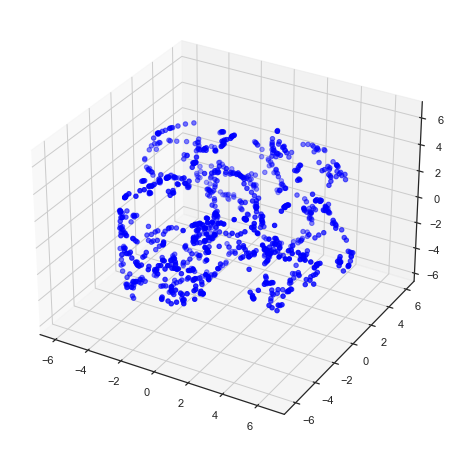

In [23]:
Axes3D

fig = plt.figure(figsize=(15, 8))

# Add 3D scatter plot
ax = fig.add_subplot(projection='3d')
ax.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1], tsne.embedding_[:,2], color='blue')
plt.show()

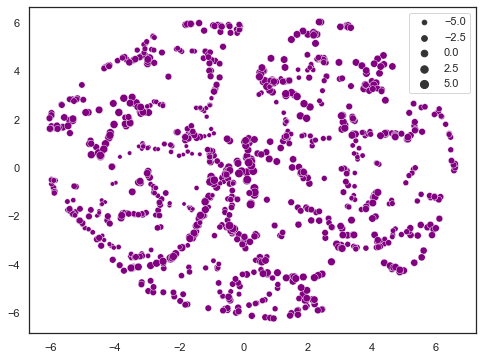

In [24]:
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(x = tsne.embedding_[:,0], y = tsne.embedding_[:,1], size=tsne.embedding_[:,2],color='purple')
plt.show()

## Principal Component Analysis

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance. 

In [25]:
# Pivoting the dataframe
pca_data_pivoted = g_scores_df.pivot_table(
        values='relevance', index='movieId', columns='tagId',
        fill_value=0, aggfunc='mean')

In [26]:
pca_data_pivoted.columns = list(g_tags_df['tag'])

In [27]:
pca_data_pivoted.head()

,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,19th century,3d,70mm,80s,9/11,aardman,aardman studios,abortion,absurd,...,wistful,witch,witches,witty,wizards,women,working class,workplace,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.02875,0.02375,0.06250,0.07575,0.14075,0.14675,0.06350,0.20375,0.2020,0.03075,0.58025,0.10250,0.20175,0.00700,0.02450,0.17275,0.01650,0.10400,...,0.07150,0.03325,0.10550,0.69400,0.10800,0.08925,0.05500,0.07700,0.04050,0.01425,0.03050,0.03500,0.14125,0.05775,0.03900,0.02975,0.08475,0.02200
2,0.04125,0.04050,0.06275,0.08275,0.09100,0.06125,0.06925,0.09600,0.0765,0.05250,0.08800,0.10275,0.14525,0.00700,0.00450,0.02750,0.01075,0.15925,...,0.02225,0.24300,0.38525,0.18725,0.21700,0.13525,0.01800,0.08725,0.05250,0.01575,0.01250,0.02000,0.12225,0.03275,0.02100,0.01100,0.10525,0.01975
3,0.04675,0.05550,0.02925,0.08700,0.04750,0.04775,0.04600,0.14275,0.0285,0.03875,0.02450,0.06475,0.08100,0.00550,0.00500,0.03475,0.00675,0.11375,...,0.02500,0.01950,0.02950,0.22325,0.02650,0.35075,0.02150,0.07325,0.06275,0.01950,0.02225,0.02300,0.12200,0.03475,0.01700,0.01800,0.09100,0.01775
4,0.03425,0.03800,0.04050,0.03100,0.06500,0.03575,0.02900,0.08650,0.0320,0.03150,0.02800,0.03475,0.07775,0.01325,0.00325,0.02650,0.01875,0.13375,...,0.03850,0.02275,0.03625,0.10725,0.02875,0.97525,0.02075,0.38650,0.05325,0.02800,0.01675,0.03875,0.18200,0.07050,0.01625,0.01425,0.08850,0.01500
5,0.04300,0.05325,0.03800,0.04100,0.05400,0.06725,0.02775,0.07650,0.0215,0.02975,0.02775,0.03300,0.05050,0.00825,0.00300,0.02525,0.01800,0.15475,...,0.03275,0.02450,0.03500,0.10475,0.03350,0.40225,0.01875,0.11200,0.05350,0.02050,0.01425,0.02550,0.19225,0.02675,0.01625,0.01300,0.08700,0.01600


In [28]:
features = [col for col in pca_data_pivoted.columns]

### Scales of measurement

It is important that we scale the data before dimensionality reduction.

Although all variables are measured on the same scale (0-1), there shouldn't be any downside to setting the mean to zero and standard deviation to 1

In [29]:
 """
    Scales data.
    """
def scaler(df):
    scaler = StandardScaler(with_std=True)
    scaled_data = scaler.fit_transform(df)
    return scaled_data

In [30]:
#Scaling the pivoted dataframe
pca_scaled = scaler(pca_data_pivoted)

In [31]:
#Creating a dataframe for the scaled data
scaled_pca = pd.DataFrame(pca_scaled, 
index = pca_data_pivoted.index, columns = pca_data_pivoted.columns)

In [32]:
#We have a look at the scaled data
scaled_pca

,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,19th century,3d,70mm,80s,9/11,aardman,aardman studios,abortion,absurd,...,wistful,witch,witches,witty,wizards,women,working class,workplace,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.249680,-0.335814,-0.141516,-0.114504,0.078419,0.555343,-0.105515,0.165267,0.783238,-0.409354,6.221019,0.340802,0.547270,-0.266926,0.591953,1.786563,-0.119751,-0.908390,...,-0.010704,-0.195175,0.352315,2.924121,0.674008,-0.908924,-0.092111,-0.475196,-0.566859,-0.353325,-0.124865,-0.330958,-0.847037,-0.439618,-0.038112,-0.097353,-0.394287,-0.115347
2,-0.074795,-0.068236,-0.139275,-0.033125,-0.260840,-0.257677,-0.048234,-0.604289,-0.151909,-0.194171,0.455035,0.343077,0.137612,-0.266926,-0.108359,-0.405395,-0.266961,-0.569922,...,-0.534079,1.846085,3.296897,-0.300735,1.986048,-0.657022,-0.483653,-0.386628,-0.478667,-0.335295,-0.247889,-0.511484,-1.002054,-0.719252,-0.280445,-0.235528,-0.197868,-0.141923
3,0.002154,0.171385,-0.439478,0.016283,-0.557479,-0.386048,-0.279850,-0.270398,-0.509575,-0.330206,-0.288774,-0.002728,-0.328238,-0.303488,-0.090852,-0.295985,-0.369369,-0.848660,...,-0.504855,-0.328988,-0.447643,-0.071638,-0.307012,0.523083,-0.446616,-0.507600,-0.403337,-0.290219,-0.181251,-0.475379,-1.004094,-0.696881,-0.334297,-0.183943,-0.334403,-0.165545
4,-0.172731,-0.108173,-0.338663,-0.634745,-0.438142,-0.500157,-0.449203,-0.672138,-0.483495,-0.401934,-0.247777,-0.275732,-0.351803,-0.114587,-0.152129,-0.420486,-0.062146,-0.726138,...,-0.361392,-0.297360,-0.376594,-0.809839,-0.279929,3.942923,-0.454552,2.199148,-0.473155,-0.188047,-0.218842,-0.285827,-0.514567,-0.297005,-0.344394,-0.211578,-0.358356,-0.198026
5,-0.050312,0.135442,-0.361067,-0.518490,-0.513154,-0.200623,-0.461656,-0.743559,-0.561734,-0.419248,-0.250705,-0.291657,-0.549381,-0.236458,-0.160883,-0.439349,-0.081348,-0.597489,...,-0.422496,-0.280329,-0.389751,-0.825749,-0.222753,0.805104,-0.475717,-0.172766,-0.471318,-0.278199,-0.235928,-0.445291,-0.430940,-0.786364,-0.344394,-0.220789,-0.372728,-0.186215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205072,-0.365105,-0.431662,0.319990,-0.570805,1.247927,-0.490647,0.327830,1.418697,-0.593402,2.882694,0.173910,-0.168805,0.772038,-0.321769,-0.064590,0.254834,-0.113350,-0.600552,...,-0.385302,-0.253566,0.481256,1.436583,2.720309,-0.758330,-0.391059,-0.120921,0.507980,-0.085876,-0.126574,0.800336,-0.859276,3.659811,-0.105427,-0.143411,2.791525,0.699626
205076,-0.116768,-0.212009,-0.414834,-0.376077,0.540426,-0.169719,-0.078120,0.697350,-0.651151,-0.441508,-0.218493,-0.207481,-0.582009,-0.273020,2.544076,7.513573,-0.068547,-0.530102,...,0.005237,-0.423874,-0.355543,0.377010,0.039053,-0.673450,0.204191,0.060537,1.176769,-0.136962,-0.013802,-0.370072,-0.120906,-0.380895,-0.001089,-0.012606,-0.509263,-0.097631
205383,-0.078293,-0.072230,-0.455160,-0.082533,0.465414,0.854877,0.967886,0.886614,0.531754,-0.233745,-0.075002,-0.257532,0.685031,-0.157242,-0.117113,-0.062076,-0.023744,1.016746,...,-0.401242,-0.246267,-0.139764,0.130412,-0.189651,0.943376,-0.171478,-0.341263,0.349970,-0.133957,-0.169290,-0.321932,-0.335074,-0.132021,0.056129,-0.102880,-0.082891,0.088396


Text(0, 0.5, 'Cumulative explained variance')

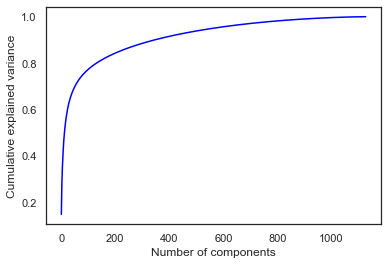

In [33]:
# define PCA object
pca = PCA()

# fit the PCA model to our data and apply the dimensionality reduction 
prin_comp = pca.fit_transform(pca_data_pivoted[features])

# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = prin_comp,
                      index=pca_data_pivoted.index, columns=pca_data_pivoted.columns
                     )

# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='blue')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [34]:
#We chose the threshold of 80% and fit the data
pca_80 = PCA(.80)
pca_80_df = pca_80.fit_transform(pca_data_pivoted)
print(round(pca_80.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",
      pca_80.n_components_,
      "components.")

80.0 % of variance explained by 131 components.


In [35]:
#Converting the data to a dataframe and having a look at the head
pca_80_df = pd.DataFrame(pca_80_df, index = pca_data_pivoted.index)
pca_80_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,...,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.796514,2.212839,-2.489444,1.624747,0.984763,1.168046,-0.203300,1.659382,-0.675962,-1.251265,-0.243100,1.458491,0.015197,-0.105688,0.425797,-0.912528,-0.355820,0.061083,...,-0.231842,0.003821,-0.240198,0.011903,-0.108367,-0.012805,0.070784,-0.095150,-0.166531,0.023522,0.124865,0.091553,-0.014734,-0.082235,0.029796,-0.077556,-0.072878,-0.094931
2,-1.541922,1.597864,-1.113613,1.302526,-0.196336,0.191809,-0.026161,1.208987,-0.369388,-0.483199,-0.226106,0.961881,-0.430214,-0.317001,-0.010892,0.299261,0.480117,-0.256093,...,-0.196130,-0.029274,0.129477,-0.080385,0.130292,0.078674,-0.034200,-0.104279,0.026369,-0.088038,0.113610,-0.050569,-0.015265,0.067904,0.026488,0.013665,0.079228,-0.130822
3,-1.506092,-0.010220,-0.605981,-0.316252,0.330972,0.334078,0.048253,0.010072,-0.042318,0.040345,0.191281,-0.182988,0.521585,-0.003704,-0.114366,-0.146336,-0.050823,0.019156,...,0.015790,-0.087111,-0.047043,0.147395,0.119151,-0.023542,-0.020572,0.151601,0.060794,-0.101178,0.033077,0.073228,-0.010904,-0.094919,0.019864,0.004834,0.059739,0.035608
4,-1.293604,-0.775662,-0.926582,-0.384600,0.103713,-0.345682,0.683775,0.218370,-0.159426,0.639183,0.406253,0.030442,-0.023683,-0.391013,0.194688,-0.379045,0.480997,0.083958,...,-0.036413,0.000460,0.121817,0.058174,-0.007047,0.057493,0.031200,0.016132,-0.036119,-0.145511,0.102927,-0.103027,0.005975,0.053953,0.044405,-0.202070,-0.158430,0.007054
5,-1.694557,-0.185986,-1.204239,-0.149549,0.470713,0.053199,0.385026,0.302557,-0.133082,-0.083749,0.364581,0.121228,0.940859,-0.199978,0.237478,-0.157197,-0.015649,-0.142857,...,-0.014334,-0.049426,-0.023443,-0.025480,0.180352,-0.231177,-0.075608,0.112447,0.016023,0.069098,-0.017486,0.005937,0.127657,-0.019529,-0.327449,-0.137680,-0.053703,0.065995


PCA shows us that we can exaplain 80% of the variance by just using 131 components. The remaining 20% would require 1000 components.

### CLUSTERING

In [52]:
# Manually implement the WCSS
def within_cluster_variation(df, label_col='cluster_label'):
    """
    Manually implements the WCSS.
    """
    centroids = df.groupby(label_col).mean()
    out = 0
    for label, point in centroids.iterrows():
        df_features = df[df[label_col] == label].drop(label_col, axis=1)
        out += (df_features - point).pow(2).sum(axis=1).sum()
    return out

In [53]:
# let's try everything between 2 and 18 clusters where 18 is the number of genres
n_clusters = np.arange(2, 19)

# store errors for each value of k
errors = []

# for i between 2 and 19
for k in n_clusters:
    print(f'training model with {k} clusters')
    # perform k-means clustering
    km = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    km.fit(pca_75_df)
    
    # measure BCSS
    print(f'evaluating model with {k} clusters')
    y_preds = km.predict(pca_75_df)
    pca_75_df = pd.DataFrame(pca_75_df)
    pca_75_df['cluster_label'] = y_preds
    errors.append(within_cluster_variation(pca_75_df, 'cluster_label'))
    print(errors[-1])

training model with 2 clusters
evaluating model with 2 clusters


AttributeError: 'NoneType' object has no attribute 'split'

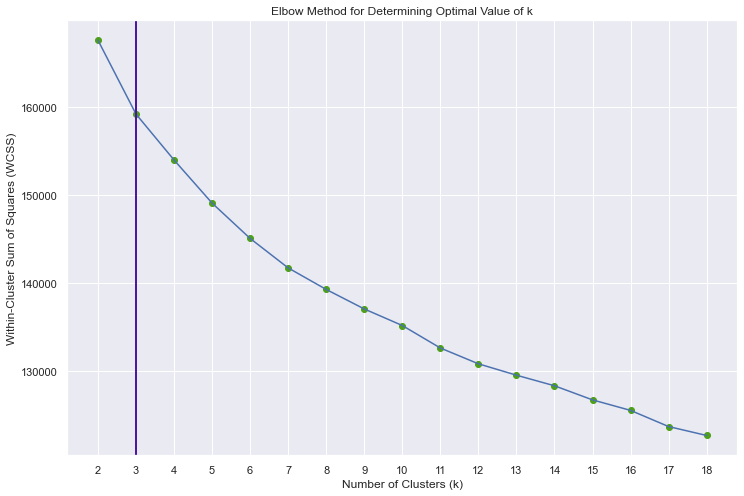

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal Value of k')
plt.scatter(n_clusters, errors, color="#4DA017")
plt.plot(n_clusters, errors)
plt.xticks(n_clusters)
plt.axvline(x=3, color='#4D17A0', lw=2)
plt.show()

In [41]:
K = 3
# Remember to set the random state for reproducibility
km = KMeans(n_clusters=K, verbose=0, random_state=42)
print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(pca_75_df)
print("done in %0.3fs" % (time() - t0))

Clustering sparse data with KMeans(n_clusters=3, random_state=42)
done in 2.348s


In [42]:
# Obtain cluster memberships for each item in the data
y_preds = km.predict(pca_75_df)
pca_75_df['cluster_label'] = y_preds
centers = km.cluster_centers_

AttributeError: 'NoneType' object has no attribute 'split'

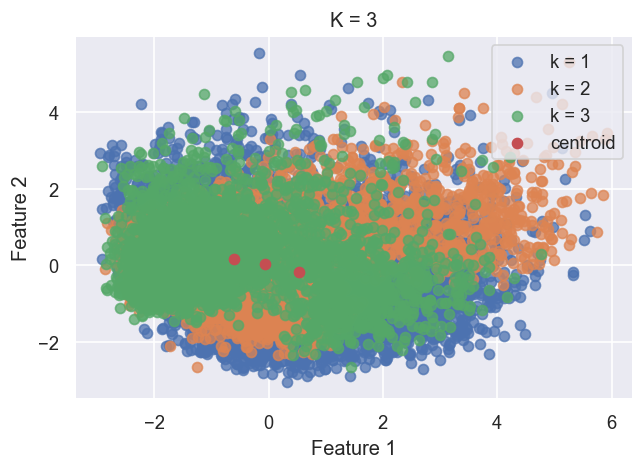

In [ ]:
plt.figure(dpi=120)
for k in range(K):
    x1 = pca_75_df[pca_75_df['cluster_label'] == k][0]
    x2 = pca_75_df[pca_75_df['cluster_label'] == k][1]
    plt.scatter(x1, x2, label="k = "+str(k+1),alpha=0.75)
# Show cluster centroid locations    
plt.scatter(centers[:,0],centers[:,1],label="centroid")
plt.legend()
plt.title(f"K = {K}")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



## 7. Model Building

In this section we are going to build a model-based recommender system.

We will start off by evaluating our models using reduced data (100k) to decrease computational time.Then the best performing model will be trained on the whole dataset to predict the ratings for the final submission file.

We start off by preparing our data for modeling. We revert back to using the original datasets with the original names.

In [55]:
#Dropping the 'timestamp' column from the training data
train_df.drop('timestamp', axis=1, inplace=True)
#Selecting only the first 100k entries
train_subset = train_df[:100000]
reader = Reader(rating_scale=(train_subset['rating'].min(), train_subset['rating'].max()))
data = Dataset.load_from_df(train_subset[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=42)

### 7.1 Collaborative Filtering

We will build seven different models and identify the based performing model based on the RMSE metric.

### 7.1.1 Singular Value Decomposition (SVD)

The Singular Value Decomposition algorithm is a matrix factorization technique which reduces the number of features of a dataset. In the matrix structure, each row represents a user and each column  in our case represents a movie. The matrix elements are ratings that are given to movies by users. It simplifies data and removes noise. However, transformed data may be difficult to understand and only works with numeric values.

In [56]:
# Instatiating the SVD model
svd_test = SVD(n_epochs = 30, n_factors = 200, init_std_dev = 0.05, random_state=42)
#Fitting the model
svd_test.fit(trainset)
#Predicting the test set
predictions = svd_test.test(testset)
# Calculate RMSE
svd_rmse = accuracy.rmse(predictions)

RMSE: 0.9746


### 7.1.2. Normal Predictor

The Normal Predictor algorithm predicts a random rating for each movie based on the distribution of the training set, which is assumed to be normal.

In [57]:
#Instantiate the model
np_test = NormalPredictor()
#Fitting the model
np_test.fit(trainset)
#Making predictions for the test set using the model
predictions = np_test.test(testset)
# Calculate RMSE
np_rmse = accuracy.rmse(predictions)

RMSE: 1.4515


### 7.1.3. Baseline Only

The Baseline Only algorithm predicts the baseline estimate for a given user and movie. A baseline is calculated using either Stochastic Gradient Descent (SGD) or Alternating Least Squares (ALS). Has few trainable parameters and is faster to train.

In [58]:
bsl_options = {'method': 'sgd','n_epochs': 40}
blo_test = BaselineOnly(bsl_options=bsl_options)
blo_test.fit(trainset)
predictions = blo_test.test(testset)
# Calculate RMSE
blo_rmse = accuracy.rmse(predictions)

Estimating biases using sgd...
RMSE: 0.9735


### 4. Non-negative Matrix Factorization (NMF)

NMF is a group of algorithms based on Non-negative Matrix Factorization. The optimization procedure is a (regularized) stochastic gradient descent with a specific choice of step size that ensures non-negativity of factors, provided that their initial values are also positive.

In [59]:
nmf_test = NMF()
nmf_test.fit(trainset)
predictions = nmf_test.test(testset)
# Calculate RMSE
nmf_rmse = accuracy.rmse(predictions)

RMSE: 1.1601


### 7.1.5. Slope One

The Slope One algorithm is a simple yet accurate collaborative filtering algorithm that uses a simple linear regression model to solve the data sparisity problem.

In [60]:
slo_test = SlopeOne()
slo_test.fit(trainset)
predictions = slo_test.test(testset)
# Calculate RMSE
slo_rmse = accuracy.rmse(predictions)

RMSE: 1.1598


### 7.1.6. Co-clustering

The Co-clustering algorithm assigns clusters using a straightforward optimization method, much like k-means.

In [61]:
cc_test = CoClustering(random_state=42)
cc_test.fit(trainset)
predictions = cc_test.test(testset)
# Calculate RMSE
cc_rmse = accuracy.rmse(predictions)

RMSE: 1.1514


### 7.1.7 SVD++

This is an extension of SVD that takes into account implicit rating

In [62]:
svdpp_test = SVDpp()
svdpp_test.fit(trainset)
predis = svdpp_test.test(testset)
# Calculate RMSE
svdpp_rmse = accuracy.rmse(predis)

RMSE: 0.9799


### Content-based Filtering

Content-based filtering, also referred to as cognitive filtering, recommends items based on a comparison between the content of the items and a user profile. The content of each item is represented as a set of descriptors or terms, typically the words that occur in a document [7]. In the following section, the model uses genres as keywords to recommend similar movies based on input from a user. The model was not used to predict ratings for the testing data, as it is too computationally expensive.

In [63]:
def data_preprocessing(subset_size):
    """Prepare data for use within Content filtering algorithm.

    Parameters
    ----------
    subset_size : int
        Number of movies to use within the algorithm.

    Returns
    -------
    Pandas Dataframe
        Subset of movies selected for content-based filtering.

    """
    # Split genre data into individual words.
    movies['keyWords'] = movies['genres'].str.replace('|', ' ')
    # Subset of the data
    movies_subset = movies[:subset_size]
    return movies_subset
 
def content_model(movie_list,top_n=10): 
    """Performs Content filtering based upon a list of movies supplied
       by the app user.

    Parameters
    ----------
    movie_list : list (str)
        Favorite movies chosen by the app user.
    top_n : type
        Number of top recommendations to return to the user.
        
          Returns
    -------
    list (str)
        Titles of the top-n movie recommendations to the user.

    """
    # Initializing the empty list of recommended movies
    data = data_preprocessing(2000)
    # Instantiating and generating the count matrix
    count_vec = CountVectorizer()
    count_matrix = count_vec.fit_transform(data['keyWords'])
    indices = pd.Series(data['title'])
    cosine_sim = cosine_similarity(count_matrix, count_matrix)
    cosine_sim = pd.DataFrame(cosine_sim, index = data.index, columns = data.index)
    # Getting the index of the movie that matches the title
    idx_1 = indices[indices == movie_list[0]].index[0]
    idx_2 = indices[indices == movie_list[1]].index[0]
    idx_3 = indices[indices == movie_list[2]].index[0]
    # Creating a Series with the similarity scores in descending order
    rank_1 = cosine_sim[idx_1]
    rank_2 = cosine_sim[idx_2]
    rank_3 = cosine_sim[idx_3]
    # Calculating the scores
    score_series_1 = pd.Series(rank_1).sort_values(ascending = False)
    score_series_2 = pd.Series(rank_2).sort_values(ascending = False)
    score_series_3 = pd.Series(rank_3).sort_values(ascending = False)
    # Getting the indexes of the 10 most similar movies
    listings = score_series_1.append(score_series_2).append(score_series_3).sort_values(ascending = False)
    # Store movie names
    recommended_movies = []
    # Appending the names of movies
    top_50_indexes = list(listings.iloc[1:50].index)
    # Removing chosen movies
    top_indexes = np.setdiff1d(top_50_indexes,[idx_1,idx_2,idx_3])
    for i in top_indexes[:top_n]:
        recommended_movies.append(list(movies['title'])[i])
    return recommended_movies

In [64]:
movies = movies_df.dropna()
movie_list = ['Grumpier Old Men (1995)','Ace Ventura: When Nature Calls (1995)','Father of the Bride Part II (1995)']
content_model(movie_list,top_n=10)

['Jury Duty (1995)',
 'Living in Oblivion (1995)',
 'Party Girl (1995)',
 'To Wong Foo, Thanks for Everything! Julie Newmar (1995)',
 'Billy Madison (1995)',
 'Man of the House (1995)',
 'Rent-a-Kid (1995)',
 'Tommy Boy (1995)',
 'Air Up There, The (1994)',
 'Beverly Hillbillies, The (1993)']

## 8. Performance Evaluation

We built and tested seven different collaborative filtering models and compared their performance using the root mean squared error (RMSE), which determines the average squared difference between the estimated values and the actual value. A low RMSE value indicates high model accuracy.

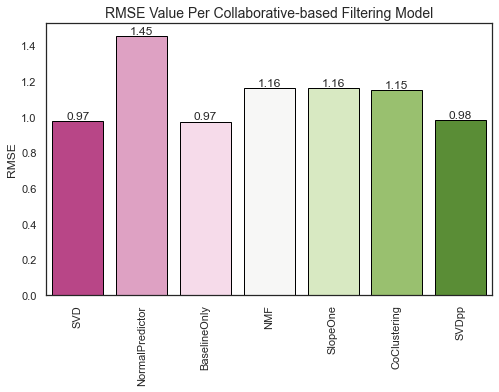

In [65]:
# Compare RMSE values between models
fig,axis = plt.subplots(figsize=(8, 5))
rmse_x = ['SVD','NormalPredictor','BaselineOnly','NMF','SlopeOne','CoClustering', 'SVDpp']
rmse_y = [svd_rmse,np_rmse,blo_rmse,nmf_rmse,slo_rmse,cc_rmse, svdpp_rmse]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='PiYG',edgecolor='black')
plt.title('RMSE Value Per Collaborative-based Filtering Model',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('RMSE')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),2), 
            fontsize=12, ha="center", va='bottom')
    
plt.show()

The three best performing models are SVD, Normal predictor and SVD++. 

## 8.1 Cross Validation

Cross validation is a technique used to test the accuracy of a model's prediction on unseen data also called validation data. Doing this  This is important because doing this can help us pick up issues such as over/underfitting and selection bias. We used the K-fold technique to perform cross validation on our two best perfoming models, i.e. SVD and BaselineOnly.

### 8.1.1 SVD

In [66]:
svd_test = SVD(n_epochs = 40, n_factors = 200, init_std_dev = 0.05, random_state=42)
# Run 5-fold cross-validation and print results
a = cross_validate(svd_test, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9745  0.9651  0.9632  0.9660  0.9725  0.9683  0.0044  
Fit time          78.43   87.42   83.35   90.04   99.90   87.83   7.20    
Test time         1.12    2.54    0.92    0.47    0.57    1.12    0.75    


### 8.1.2 Baseline Only

In [67]:
bsl_options = {'method': 'sgd','n_epochs': 40}
blo_test = BaselineOnly(bsl_options=bsl_options)
# Run 5-fold cross-validation and print results
b = cross_validate(blo_test, data, measures=['RMSE'], cv=5, verbose=True)

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Evaluating RMSE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9652  0.9744  0.9655  0.9615  0.9729  0.9679  0.0049  
Fit time          4.90    4.34    4.10    4.19    4.26    4.36    0.28    
Test time         0.83    0.40    0.40    0.74    0.42    0.56    0.19    


## 9. Model Analysis

In [68]:
# Load the 100k dataset
train_subset = train_df[:100000]
reader = Reader(rating_scale=(train_subset['rating'].min(), train_subset['rating'].max()))
data = Dataset.load_from_df(train_subset[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=42)

### 9.1 Hyperparameter Tuning

Hyperparameter tuning is the process by which a set of ideal hyperparameters are chosen for a model. A hyperparameter is a parameter for which the value is set manually and tuned to control the algorithm's learning process. We tested multiple parameters for our best performing model which is SVD.

In [69]:
param_grid = {'n_epochs':[40], #[30,40,50],
              'n_factors':[400], #[100,200,300,400],
              'init_std_dev':[0.005], #[0.001,0.005,0.05,0.1],
              'random_state':[42]} 
grid_SVD = GridSearchCV(SVD, cv=5, measures=['rmse'], param_grid=param_grid, n_jobs=-1)
grid_SVD.fit(data)
print('***Best score:***')
print(grid_SVD.best_score['rmse'])
print('***Best parameters:***')
print(grid_SVD.best_params['rmse'])

***Best score:***
0.9672253121729799
***Best parameters:***
{'n_epochs': 40, 'n_factors': 400, 'init_std_dev': 0.005, 'random_state': 42}


## Results

We use the best hyperparameters to train our model.

In [70]:
# Instantiate the model and choose the best hyperparameters
svd_test = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42)
svd_test.fit(trainset)
predictions = svd_test.test(testset)
# Calculate RMSE
svd_rmse = accuracy.rmse(predictions)

RMSE: 0.9734


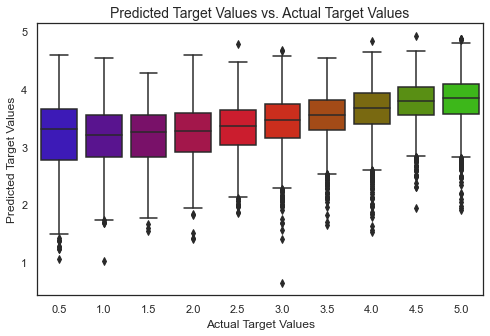

In [71]:
# Predicted Target Values vs. Actual Target Values
new_df = pd.DataFrame(columns=['uid', 'iid', 'rating'])
i = 0
for (uid, iid, rating) in testset:
    new_df.loc[i] = [uid, iid, rating]
    i = i+1
true = new_df['rating']
pred = []
for i in predictions:
    pred.append(i.est)
fig,axis = plt.subplots(figsize=(8, 5))
sns.boxplot(x=true, y=pred, palette="brg")
plt.title("Predicted Target Values vs. Actual Target Values", fontsize=14)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.show()

In [ ]:
# Training model on whole dataset
reader = Reader(rating_scale=(train_df['rating'].min(), train_df['rating'].max()))
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
svd = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42, verbose=True)
svd.fit(trainset)

In [ ]:
test_df

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318
...,...,...
5000014,162541,4079
5000015,162541,4467
5000016,162541,4980
5000017,162541,5689


## 9. Kaggle submission

In [ ]:
test_df["Id"] = test_df.userId.astype(str) + '_' + test_df.movieId.astype(str)
test_df

,userId,movieId,Id
0,1,2011,1_2011
1,1,4144,1_4144
2,1,5767,1_5767
3,1,6711,1_6711
4,1,7318,1_7318
...,...,...,...
5000014,162541,4079,162541_4079
5000015,162541,4467,162541_4467
5000016,162541,4980,162541_4980
5000017,162541,5689,162541_5689


In [ ]:
test_df.loc[:,'rating'] = 0
test_df.shape

(5000019, 4)

In [ ]:
test_df.loc[:,'rating'] = 0
test_df.shape

(5000019, 4)

In [ ]:
#saving the predictions as a list to add as a column for our Kaggle submission
rating = [i for i in predictions]
len(rating)

25000

In [ ]:
#change rating column
#test_df['rating'] = rating
#del test_df['userId']
#del test_df['movieId']

In [ ]:
test_df

In [ ]:
test_df['R'] = test_df['rating']
del test_df['rating']

In [ ]:
test_df['rating'] = test_df['R']

In [ ]:
del test_df['R']

In [ ]:
test_df

In [ ]:
test_df.to_csv('submissionsvd.csv', index = False)

In [ ]:
#params = {'n_epochs':40, #[30,40,50],
          'n_factors':400, #[100,200,300],
          'init_std_dev':0.005, #[0.005,0.05,0.1],
         'random_state':[42]} 
#metrics = {"RMSE": np.sqrt(mean_squared_error(true, pred))}

#experiment.log_parameters(params)
#experiment.log_metrics(metrics)
#experiment.end()

## 10. Conclusion

In this project, we succeeded in building an unsupervised machine learning model that is able to recommend movies based on content-based or collaborative filtering and is capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences. Our top performing model has a root mean squared error (RMSE) of 0.97, based on a testing set submitted to the EDSA Kaggle competition.

The BaselineOnly algorithm is a baseline approach to recommender systems, as it has a broad range of applications including dimensionality reduction, solving linear inverse problems, and data fitting. The BaselineOnly algorithm generally performs better on large datasets compared to some other models as it decomposes a matrix into constituent arrays of feature vectors corresponding to each row and each column.

## 11. Save Output

## References

1. https://towardsdatascience.com/brief-on-recommender-systems-b86a1068a4dd
2. https://www.kaggle.com/c/edsa-movie-recommendation-wilderness
3. https://surprise.readthedocs.io/en/stable/matrix_factorization.html
4.